In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
table = pd.read_csv('./results_table.csv', index_col=0, header=0)

In [4]:
table.dtypes

Undersampled?     object
Accuracy          object
Precision        float64
Recall           float64
F1-Score         float64
dtype: object

In [6]:
table['Accuracy'] = table['Accuracy'].apply(lambda x: float(x.replace('%', '')) / 100.0)

In [7]:
table

,Undersampled?,Accuracy,Precision,Recall,F1-Score
Name of Model,,,,,
KNN (N = 10),Y,0.834,0.60,0.78,0.62
SVM,Y,0.833,0.60,0.79,0.62
One Class SVM,N,0.714,0.48,0.44,0.44
CART,N,0.946,0.76,0.58,0.62
C 50,Y,0.826,0.59,0.78,0.61
Random Forest,N,0.941,0.71,0.60,0.63
Logistic Regression,Y,0.830,0.60,0.80,0.61
Naive Bayes (Bernoulli),Y,0.700,0.58,0.77,0.58
ANN,N,0.950,0.76,0.62,0.66


In [59]:
regular = table[table['Undersampled?'] == 'N']
undersampled = table.drop(index=regular.index)

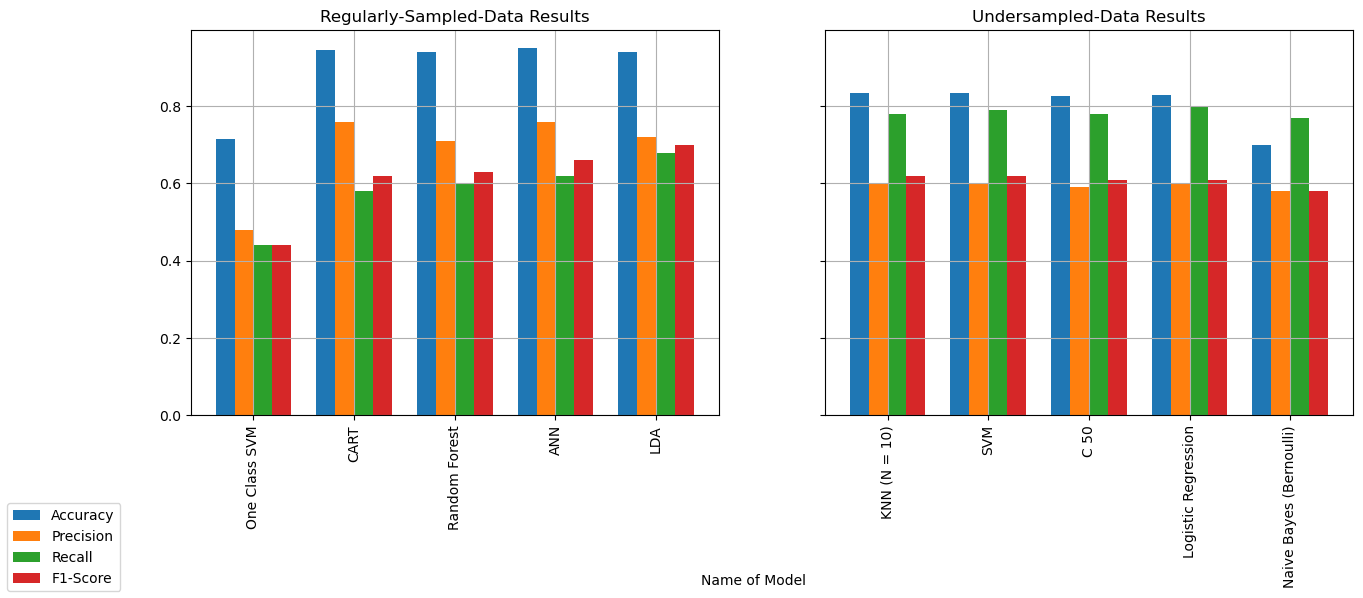

In [96]:
fig, (regular_ax, undersampled_ax) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

regular.plot(
    kind='bar', 
    stacked=False, 
    title='Regularly-Sampled-Data Results',
    ax=regular_ax,
    width=0.75,
)

undersampled.plot(
    kind='bar', 
    stacked=False, 
    title='Undersampled-Data Results',
    ax=undersampled_ax,
    width=0.75,
)

regular_ax.get_legend().remove()
undersampled_ax.get_legend().remove()

regular_ax.set_xlabel('')
undersampled_ax.set_xlabel('')

regular_ax.grid()
undersampled_ax.grid()

fig.text(0.5, -0.23, 'Name of Model', ha='center')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='lower left')

plt.show()